In [1]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa

##### Project
# Cluster/classify images of handwritten text

The text can be:
    - any language
    - any symbols
    - any artwork
    etc.
     

### Creating image data from scratch

Instructions (on-screen):

    Step-1: Open drawing or sketching or powerpont software. Enable option to show grid. 
    Step-2: Select appropriate line thickness and write a character in each square. Write one character-type per page. Depending on the page size try to get about 500 to 700 characters. 
    Step-3: Save the image as 'jpg'
    Step-4: Repeat steps 1 to 3 for other characters


Instructions (paper and pencil):

    Step-1: (on paper): Take a blank paper and draw a grid of equidistant lines to form squares of same shape. 
    Step-2: Create as many such pages as many characters you need in data
    Step-3: On each page write a character in each square. Try to get 500 to 700 characters.
    Step-4: Preferably scan the page on scanner. If scanner is not available use a cellphone camera. However note that the image quality may suffer.
    Step-5: Repeat steps 1 to 5 for other characters

### Download available data

If you plan to use data that is already available see below!

Image data description:
    - text are handwritten characters in an Indian language alphabets (Devnagari script). 
    - each image page has 702 handwritten characters
    - each image page is of size 1650 × 2400 pixels (300 x 300 resolution)
    - total 12 pages i.e. one for each character
    - total character images = 8424
    - image size based on resolution: 64x64 (1 KB); 16x16 ( ~0.8 KB); 8x8 (~0.6 KB)

Additional information:
    - Devnagari script is from 1st to 7th century CE 
    - Wikipedia: <https://en.wikipedia.org/wiki/Devanagari>

Why Hindi?
    - I was looking for script other than English because there are already several datasets available
    - Devnagari script is used in present day language Hindi, that I can write. So thought it would be cool to see clusters!
   
    
Download data:
    - https://github.com/learndataa/datasets/raw/09354028053d88203a738a3330a45e8aa1093b01/handwritten_text.zip
    - https://github.com/learndataa/datasets/tree/09354028053d88203a738a3330a45e8aa1093b01

# Let's begin !

### Import libraries

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster
from sklearn import metrics
from sklearn import preprocessing
from sklearn import datasets
from sklearn import ensemble
from sklearn import discriminant_analysis
from sklearn import neighbors
from sklearn import random_projection
from sklearn import decomposition
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn import linear_model
from sklearn import manifold

from scipy import ndimage

from time import time
import os

### Read image page and save to small images

In [3]:
dpi = 226 # dpi of screen [* * * This value may be different for your screen! * * *]

In [4]:
# Set path for the project folder
path = '/Users/erv/Desktop/python/capstone_project/handwriting/'

In [5]:
# Names of sub-folders 
f_list = ['A.jpg', 'B.jpg', 'C.jpg', 'D.jpg', 'E.jpg', 'F.jpg', 
             'G.jpg', 'H.jpg', 'I.jpg', 'J.jpg', 'K.jpg', 'L.jpg']

#f_list = ['ee.jpg']


In [6]:
# Function to split page
def split_page(img):
    

    temp = []
    g = 75 # gap

    rc = img.shape[0] # row count
    cc = img.shape[1] # column count

    ri = 0
    for i in range(rc):
        #ri += 1
        ci = 0
        for j in range(cc):
            #ci += 1
            if((ci < cc) and (ri < rc)):
                blop = img[ri:ri+g, ci:ci+g].copy()
                temp.append(blop)

                #img2[0:ri+g, 0:ci+g]=0

                ci += g
        ri += g

        #if(img2.sum()<1000):
        #    break;

    print('len(temp):', len(temp))   
    return temp


# Function to save images
def save_to_fig(img_list, fname, pix, dpi):
    
    # create directory 
    os.makedirs(path + 'data/' + fname.split('.')[0], exist_ok=True) 
    
    # save figures
    for i in range(len(img_list)):
        plt.figure(figsize=(pix/dpi, pix/dpi), dpi=dpi)
        plt.imshow(img_list[i], cmap='gray')
        plt.axis('off')
        plt.savefig(path + 'data/' + fname.split('.')[0] + '/' + fname.split('.')[0] + '_' + str(i) + '.jpg')
        #plt.show()
        plt.close()
        
        

In [7]:
# Set pixel value to resize
pix = 64  # <- creates 'pix x pix' sized image

# Read and save images
for fname in f_list:
    #print(fname)
    #print(fname.split('.')[0])
    
    img = plt.imread(path + fname)
    
    # Split page to images
    img_list = split_page(img)
    
    # Save data X, y
    #X, y = get_X_y(temp,fname)
    
    # Save each image as jpg
    save_to_fig(img_list, fname, pix, dpi)
    

len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704
len(temp): 704


### Create X and y 

[Iterate over all the image folders]

In [8]:
data = [] 

i = 0

img_dir = path + 'data/'


dirs = list(os.walk(img_dir))[0][1]
#print('dirs:', dirs)

for subdir in dirs:
    subdir_path = os.path.join(img_dir, subdir)
    file_list = os.listdir(subdir_path)
    
    #print('subdir_path:', subdir_path)
    #print('file_list:', file_list, '\nlen(file_list):', len(file_list))

    for fname in file_list:
        #print('fname:', fname)
        file_path = os.path.join(subdir_path, fname)
        img = plt.imread(file_path)
        A = img [:,:,0]
        #print("A.shape:", A.shape)

        if(i==0):
            X = np.ravel(A).reshape(1, A.shape[0]*A.shape[1])
            y = [fname.split("_")[0]]

            i+=1
        else:
            X = np.vstack([X, np.ravel(A)])
            y.append(fname.split("_")[0])
        
        #print("X.shape:", X.shape, ", len(y):",len(y))
        plt.clf()
        plt.close()
        #print('End of inner for loop \n\n\n')
        
    #print("X.shape:", X.shape, ", len(y):",len(y))
    #print('End of outer for loop \n\n\n')

    #break;


# Encode y to integers
y_main = y.copy()
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y)
y = y.reshape(-1)

# X main copy
X_main = X.copy()

print(X.shape)
print(len(y))

(8448, 4096)
8448


In [43]:
64*64

4096

In [9]:
# Used in plotting later
d = X.reshape(X.shape[0], int(X.shape[1]**0.5), int(X.shape[1]**0.5))
d.shape

(8448, 64, 64)

#### Check labels for 'y'

In [10]:
set(tuple(zip(y_main, y)) )

{('A', 0),
 ('B', 1),
 ('C', 2),
 ('D', 3),
 ('E', 4),
 ('F', 5),
 ('G', 6),
 ('H', 7),
 ('I', 8),
 ('J', 9),
 ('K', 10),
 ('L', 11)}

In [11]:
"""
# (optional)
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
"""

'\n# (optional)\nenc = preprocessing.LabelEncoder()\ny = enc.fit_transform(y_main)\ny = y.reshape(-1)\n'

# Manifold

### Get X, y

In [12]:
X = X_main.copy()

scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)

y = y

print(X.shape, y.shape)

pix = 64

(8448, 4096) (8448,)


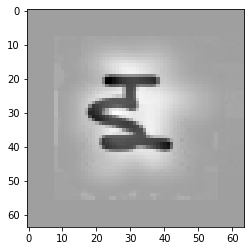

In [46]:
plt.imshow(X[1000,:].reshape(64,64), cmap='gray')
plt.show()

Random 2D projection  in progress ...
done!
PCA  in progress ...
done!
LDA  in progress ...
done!
Isomap  in progress ...
done!
Locally Linear Embedding  in progress ...
done!
Modified LLE  in progress ...
done!
Manifold MDS  in progress ...
done!
Spectral Embedding  in progress ...
done!
t-SNE  in progress ...
done!
NCA  in progress ...
done!
Voila! 


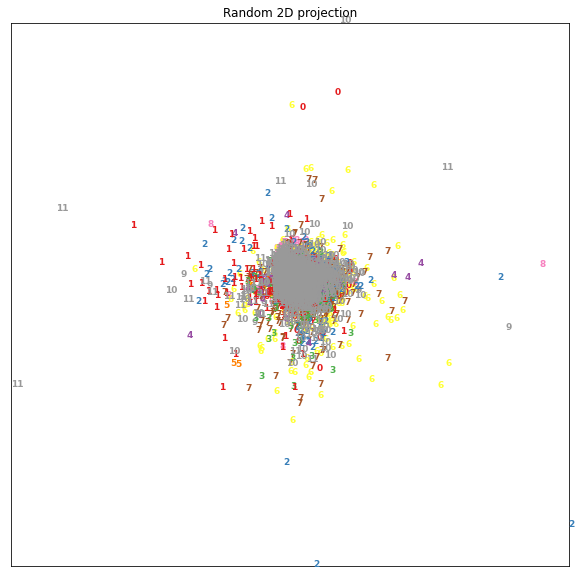

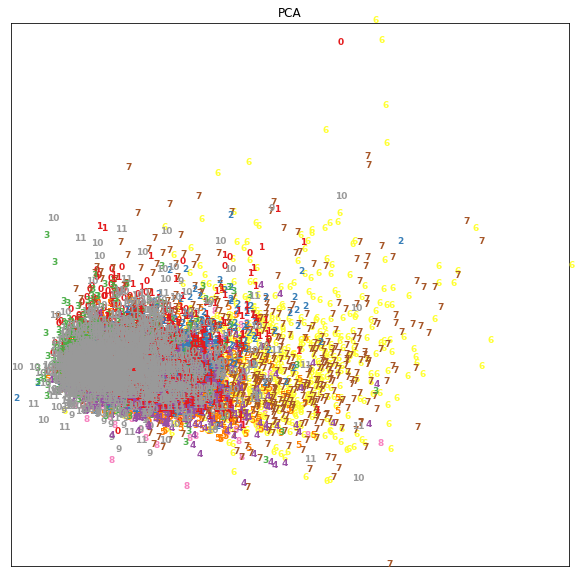

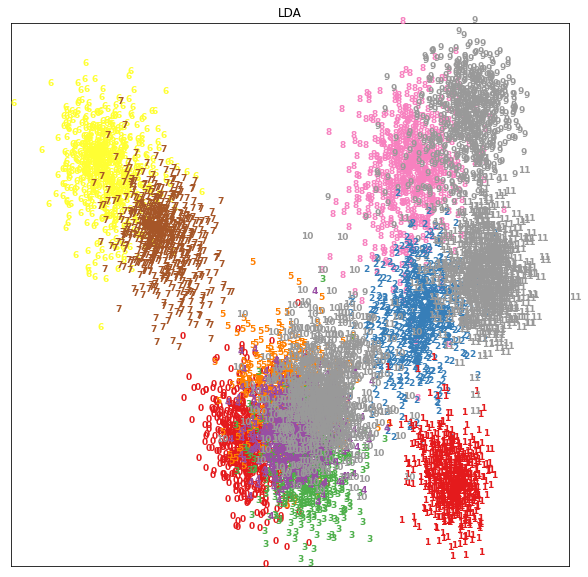

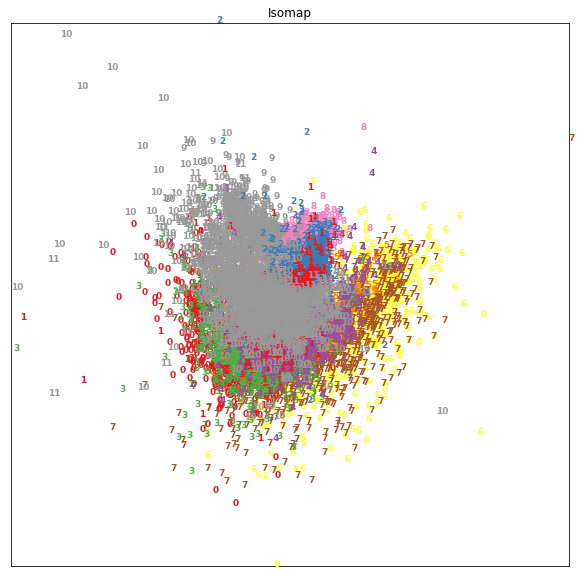

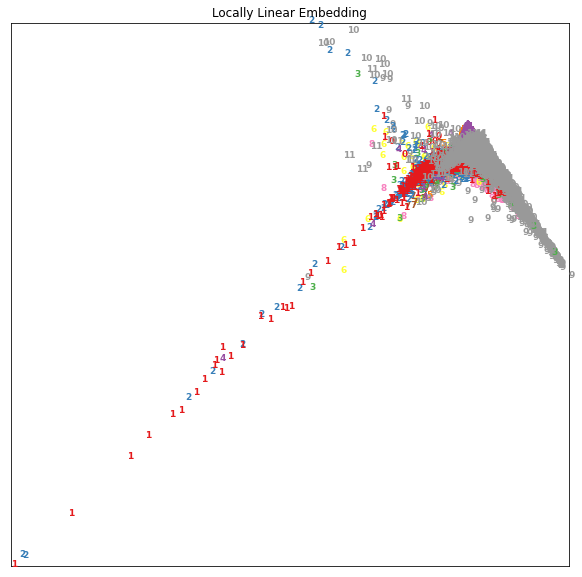

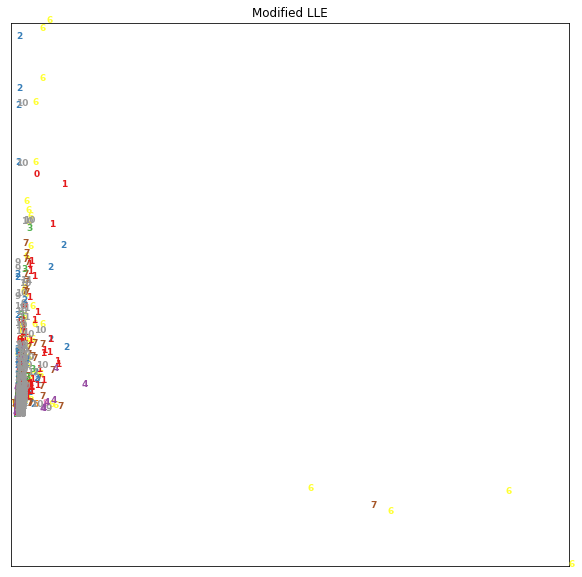

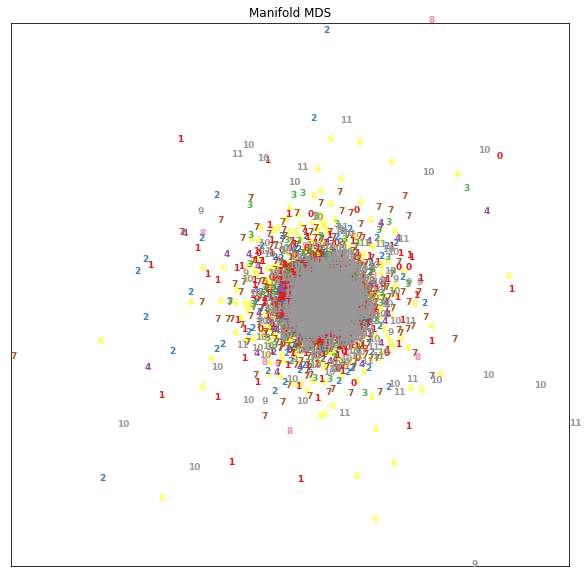

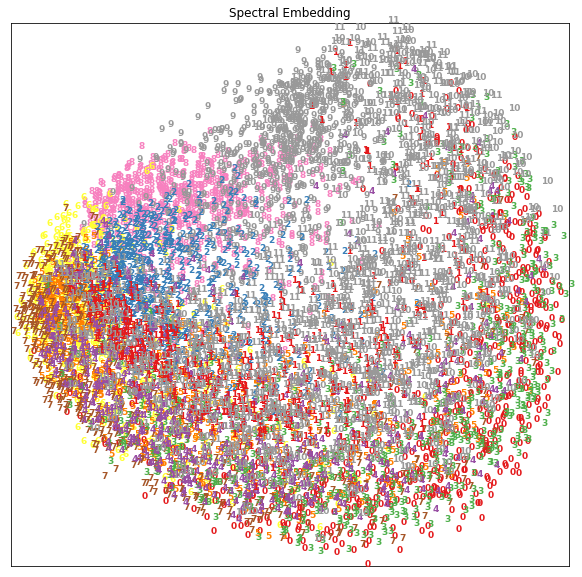

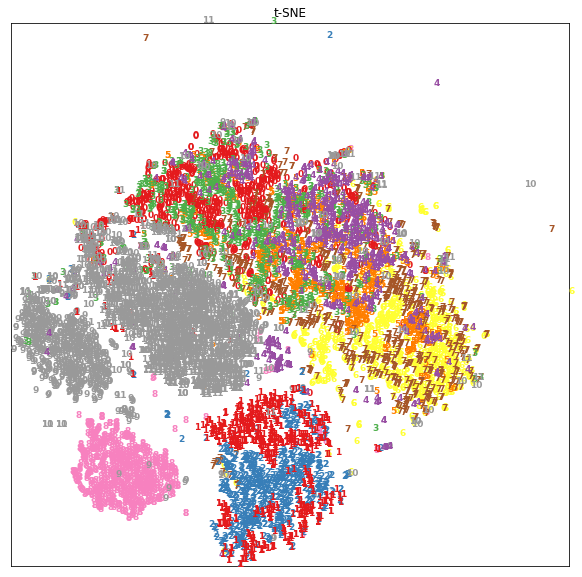

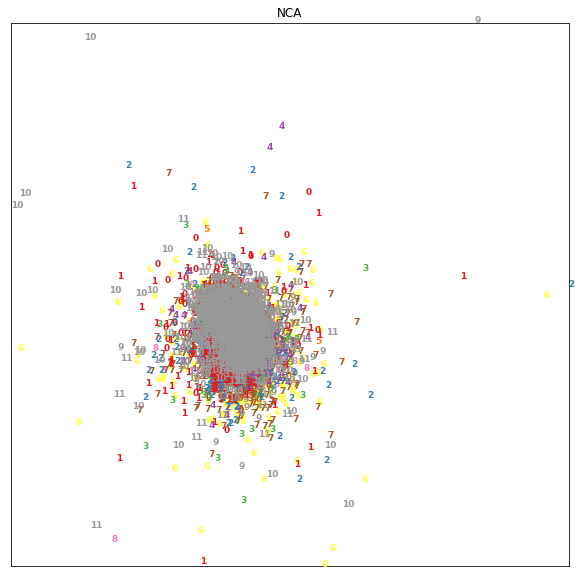

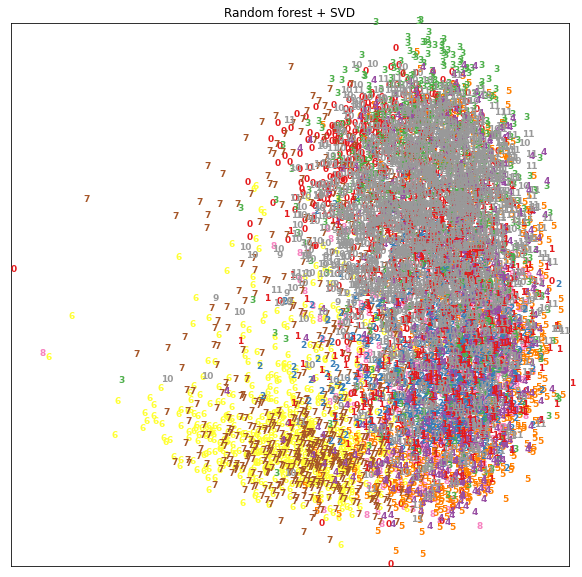

In [38]:
def plot_proj(X, title=None):    
    scl = preprocessing.MinMaxScaler()
    X = scl.fit_transform(X)
    plt.figure(figsize=(10,10))
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    plt.xticks([]), plt.yticks([])
    plt.title(title)

n_neighbors=30        
models = [
    ('Random 2D projection', random_projection.SparseRandomProjection(n_components=2, random_state=0)),
    ('PCA', decomposition.TruncatedSVD(n_components=2)),
    ('LDA', discriminant_analysis.LinearDiscriminantAnalysis(n_components=2)),
    ('Isomap', manifold.Isomap(n_neighbors=n_neighbors, n_components=2)),
    ('Locally Linear Embedding', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='standard')),
    ('Modified LLE', manifold.LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=2,method='modified')),
    ('Manifold MDS', manifold.MDS(n_components=2, n_init=1, max_iter=100)),
    ('Spectral Embedding', manifold.SpectralEmbedding(n_components=2, random_state=0,eigen_solver="arpack")),
    ('t-SNE', manifold.TSNE(n_components=2, init='pca',perplexity=50,random_state=0)),
    ('NCA', neighbors.NeighborhoodComponentsAnalysis(init='random', n_components=2, random_state=0))
]



for name, model in models:
    print(name, ' in progress ...')
    if (name=='LDA'):
        X2 = X.copy()*1.0
        X2.flat[::X.shape[1] + 1] += 0.01
        X_trans = model.fit_transform(X2, y.reshape(-1,))
    elif(name=='NCA'):
        X_trans = model.fit_transform(X,y)
    else:
        X_trans = model.fit_transform(X)
        
    plot_proj(X_trans, name)
    print('done!')


# Random Trees 
X_t = ensemble.RandomTreesEmbedding(n_estimators=200, random_state=0,max_depth=5).fit_transform(X)
X_trans = decomposition.TruncatedSVD(n_components=2).fit_transform(X_t)
plot_proj(X_trans,"Random forest + SVD")

print('Voila! ')

plt.show()

# Clustering

### Functions

In [19]:
# Function to get cluster metrics:
def get_cluster_metrics(y, y_pred):
    metrics_list = [
        ('rand_score (RI) \n[0 to 1 (good)]', metrics.rand_score(y, y_pred)),
        ('adjusted_rand_score (ARI) \n[0 to 1 (good)]', metrics.adjusted_rand_score(y, y_pred)),
        ('mutual_info_score (MI) \n[0 to 1 (good)]', metrics.mutual_info_score(y, y_pred)),
        ('adjusted_mutual_info_score (AMI) \n[0 to 1 (good)]', metrics.adjusted_mutual_info_score(y, y_pred)),
        ('homogeneity_completeness_v_measure \n[0 to 1 (good)]', metrics.homogeneity_completeness_v_measure(y, y_pred)),
        ('fowlkes_mallows_score (FMI) \n[0 to 1 (good)]', metrics.fowlkes_mallows_score(y, y_pred)),
        ('silhouette_score \n[-1 to 1 (good)]', metrics.silhouette_score(X, y_pred)),
        ('calinski_harabasz_score \n[low to high (good)]', metrics.calinski_harabasz_score(X, y_pred)),
        ('davies_bouldin_score  \n[0 (good) to high]', metrics.davies_bouldin_score(X, y_pred))
    ]
    for name, metric in metrics_list:
        print(name,"\t:", np.round(metric, 2))
    print("\n")
        

# Plot cluster
# Function to plot
def plot_cluster(X, labels, title=None):
    x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure(figsize=(15, 15))    
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]), color=plt.cm.nipy_spectral(labels[i] / 10.))
        plt.title(title, size=18)


### Get X, y 
using only three image sets

In [39]:
X = X_main.copy()
y = y


# Shortlisted X, y
x1 = X[y==2]
x2 = X[y==9]
x3 = X[y==6]

y1 = y[y==2]
y2 = y[y==9]
y3 = y[y==6]

X = np.vstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])


scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)

print(X.shape, y.shape)

(2112, 4096) (2112,)


In [40]:
"""
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
print(y.shape, len(y_main))

"""

'\nenc = preprocessing.LabelEncoder()\ny = enc.fit_transform(y_main)\ny = y.reshape(-1)\nprint(y.shape, len(y_main))\n\n'

### Fit, metrics

In [41]:
n_clusters= len(set(y))
print("True number of clusters: ", n_clusters)



# Create models
bandwidth = cluster.estimate_bandwidth(X, quantile=.99, n_samples=500)

models = [
    ('MiniBatch KMeans', cluster.MiniBatchKMeans(n_clusters=n_clusters)),
    ('Affinity Propagation', cluster.AffinityPropagation(damping=0.99, random_state=0,
                                                        max_iter=1000)),
    ('MeanShift', cluster.MeanShift(bandwidth=bandwidth)),
    ('Spectral Clustering', cluster.SpectralClustering(n_clusters=n_clusters, 
                                                       #n_components=2,
                                                       random_state=0,
                                                      n_neighbors=50, 
                                                       affinity='nearest_neighbors')),
    ('Agglomerative Clustering', cluster.AgglomerativeClustering(linkage='ward',
                                                                 n_clusters=n_clusters)),
    ('DBSCAN', cluster.DBSCAN(eps=22, min_samples=7)), #100
    ('OPTICS', cluster.OPTICS()),
    ('BIRCH', cluster.Birch(n_clusters=n_clusters))
]



# Loop through each model and evaluate
for name, model in models:
    print('\n','-'*25)
    print(name)
    print('-'*25)

    model.fit(X)
    
    if hasattr(model, 'labels_'):
        print('* using labels *')
        y_pred = model.labels_.astype(int)
    else:
        print('* using predict *')
        y_pred = model.predict(X)

    
    if (name in ['Affinity Propagation','MeanShift']):
        print("Number of clusters found: ", len(model.cluster_centers_))
    elif (name in ['DBSCAN','OPTICS', 'BIRCH' ]):
        print("Number of clusters found: ", set(model.labels_))
    else:
        print("Number of clusters asked to find: ", n_clusters)
        
 
    get_cluster_metrics(y, y_pred)
    
    #break;

        

True number of clusters:  3

 -------------------------
MiniBatch KMeans
-------------------------
* using labels *
Number of clusters asked to find:  3
rand_score (RI) 
[0 to 1 (good)] 	: 0.57
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.16
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.15
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.17
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.14 0.23 0.17]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.52
silhouette_score 
[-1 to 1 (good)] 	: 0.02
calinski_harabasz_score 
[low to high (good)] 	: 54.28
davies_bouldin_score  
[0 (good) to high] 	: 3.35



 -------------------------
Affinity Propagation
-------------------------
* using labels *
Number of clusters found:  228
rand_score (RI) 
[0 to 1 (good)] 	: 0.69
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.11
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.86
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.31
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	

## Agglomerative clustering

### Get X, y

In [24]:
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
print(y.shape, len(y_main))


(8448,) 8448


In [25]:
X = X_main.copy()
y = y


# Shortlisted X, y
x1 = X[y==2]
x2 = X[y==9]
x3 = X[y==6]

y1 = y[y==2]
y2 = y[y==9]
y3 = y[y==6]

X = np.vstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])


scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)

print(X.shape, y.shape)

(2112, 4096) (2112,)


-------------------------
ward
-------------------------
rand_score (RI) 
[0 to 1 (good)] 	: 0.86
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.7
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.79
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.73
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.72 0.74 0.73]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.8
silhouette_score 
[-1 to 1 (good)] 	: 0.01
calinski_harabasz_score 
[low to high (good)] 	: 63.88
davies_bouldin_score  
[0 (good) to high] 	: 4.69


-------------------------
average
-------------------------
rand_score (RI) 
[0 to 1 (good)] 	: 0.91
adjusted_rand_score (ARI) 
[0 to 1 (good)] 	: 0.79
mutual_info_score (MI) 
[0 to 1 (good)] 	: 0.85
adjusted_mutual_info_score (AMI) 
[0 to 1 (good)] 	: 0.78
homogeneity_completeness_v_measure 
[0 to 1 (good)] 	: [0.77 0.78 0.78]
fowlkes_mallows_score (FMI) 
[0 to 1 (good)] 	: 0.86
silhouette_score 
[-1 to 1 (good)] 	: 0.01
calinski_harabasz_score 
[low to high (good)] 

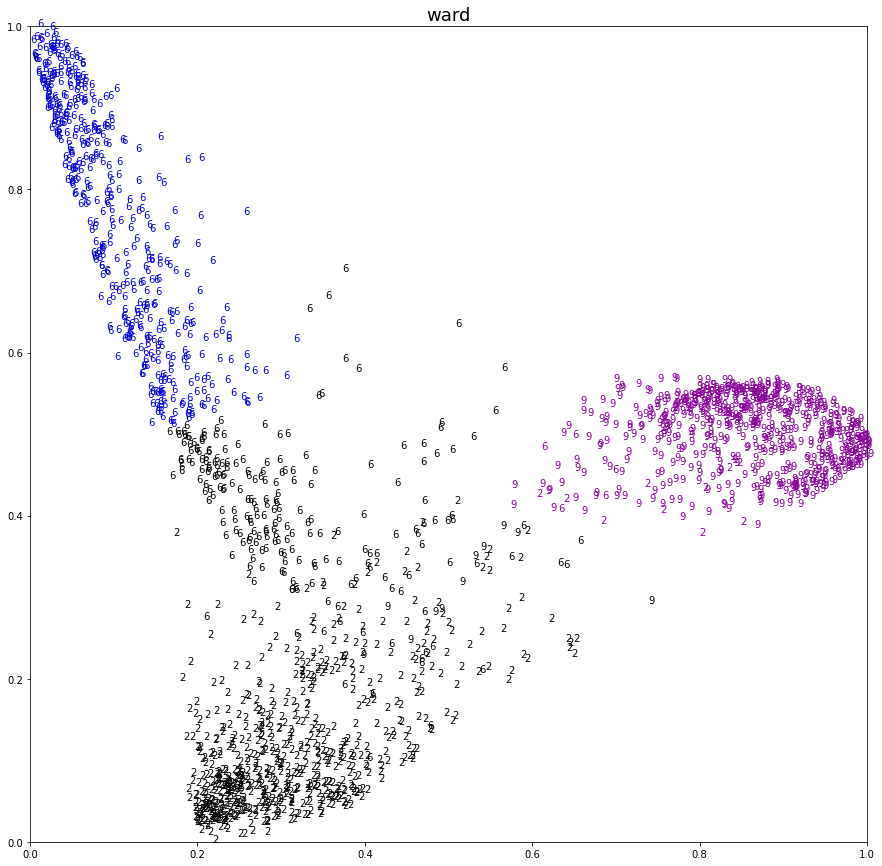

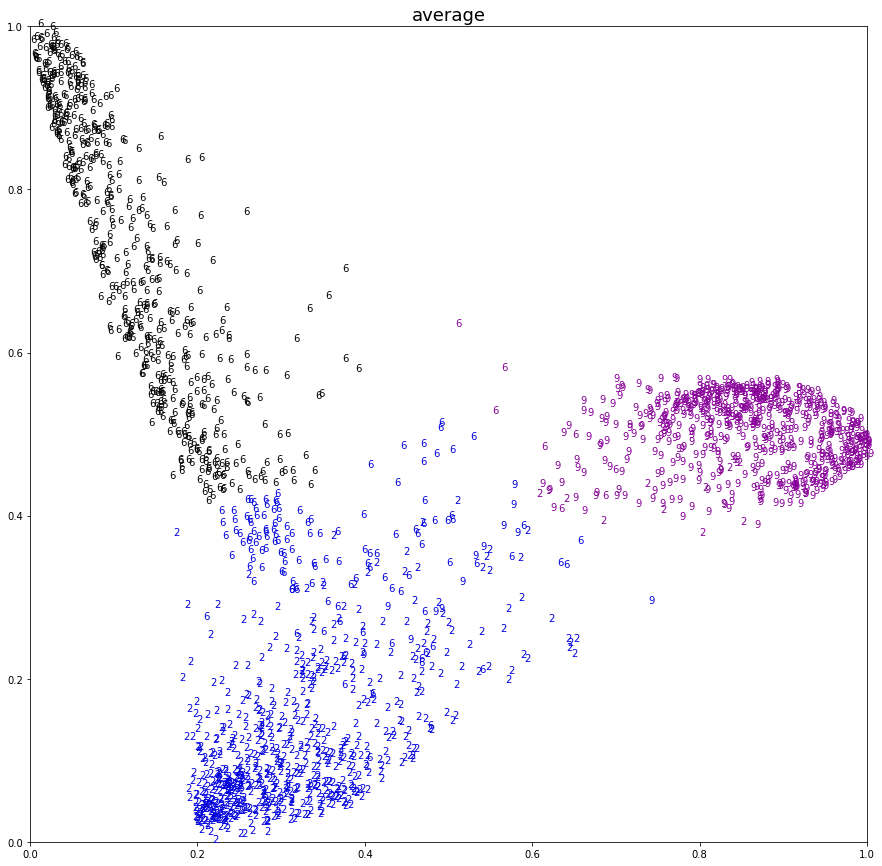

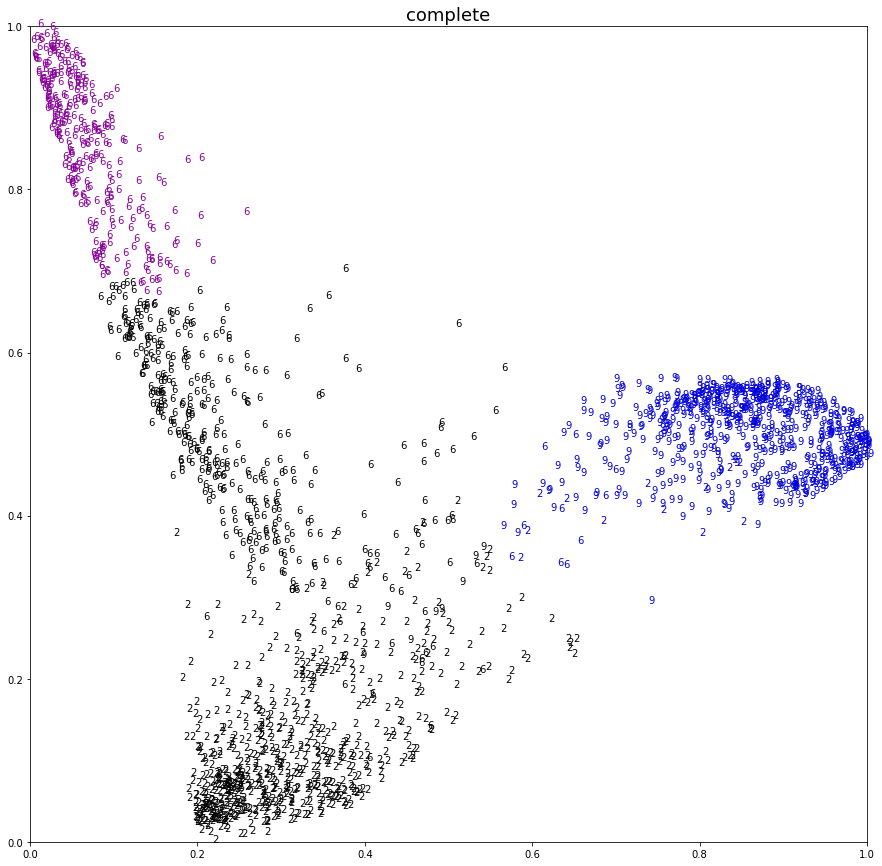

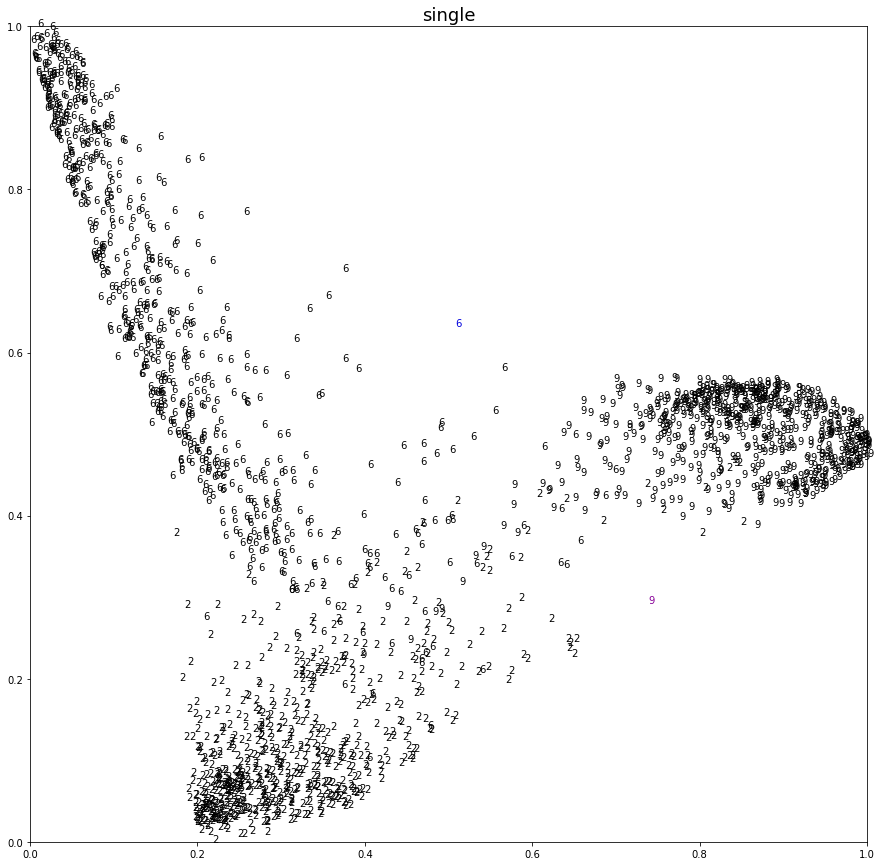

In [26]:

np.random.seed(0)
n_samples, n_features = X.shape
pix = 64 # pixels x pixels
n_clusters = 3



# Convert or embed data to a lower dimensional space
model = manifold.SpectralEmbedding(n_components=2,
                                   affinity='nearest_neighbors',
                                   n_neighbors=50
                                  )
Xs = model.fit_transform(X)

# Try different types of linkages
for linkage in ('ward', 'average', 'complete', 'single'):
    print('-'*25)
    print(linkage)
    print('-'*25)
    
    # Fit
    clust = cluster.AgglomerativeClustering(linkage=linkage,n_clusters=n_clusters)
    clust.fit(Xs)
    
    # Pred
    y_pred = clust.labels_.astype(int)
    
    # Plot
    plot_cluster(Xs, clust.labels_, linkage)
    
    # Metrics
    get_cluster_metrics(y, y_pred)


plt.show()

# Classification

#### Data (full)

In [53]:
enc = preprocessing.LabelEncoder()
y = enc.fit_transform(y_main)
y = y.reshape(-1)
print(y.shape, len(y_main))

(8448,) 8448


In [54]:
X = X_main.copy()

scl = preprocessing.StandardScaler()
X = scl.fit_transform(X)

y = y

print(X.shape, y.shape)

pix = 64

(8448, 4096) (8448,)


In [55]:
# Split data into 50% train and 50% test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)
print(X_train.shape, X_test.shape)

(4224, 4096) (4224, 4096)


#### Plot original images

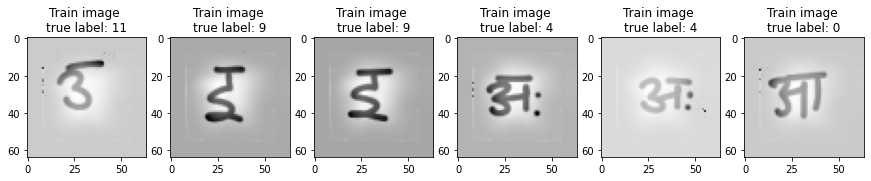

In [56]:
np.random.seed(1)

show_img = 6
n_sample = np.random.randint(1,len(X_test),show_img)
fig, axs = plt.subplots(nrows=1, ncols=show_img, figsize=(15,5))
for ax, img, true_l in zip(axs, X_train[n_sample,:], y_train[n_sample]):
    img = img.reshape(64,64)
    ax.imshow(img, cmap='gray')
    ax.set_title('Train image \ntrue label: '+ str(true_l))


#### Fit and predict class

In [57]:
# Model
#clf = svm.SVC(gamma=0.001)
#clf = linear_model.RidgeClassifier()
clf = ensemble.RandomForestClassifier(n_estimators=100)
#clf = ensemble.AdaBoostClassifier(n_estimators=1000)

# Fit
clf.fit(X_train, y_train)

# Predict
y_pred = clf.predict(X_test)

#### Plot predictions

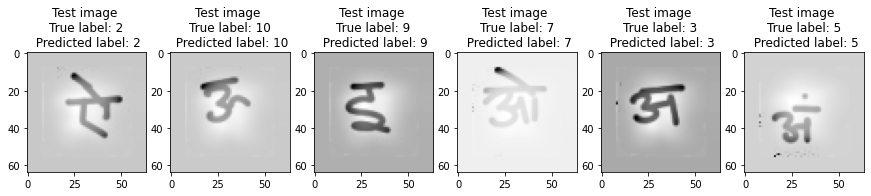

In [58]:
fig, axs = plt.subplots(nrows=1, ncols=show_img, figsize=(15,5))
for ax, img, pred_l, true_l in zip(axs, X_test[n_sample,:], y_pred[n_sample], y_test[n_sample]):
    img = img.reshape(64,64)
    ax.imshow(img, cmap='gray')
    ax.set_title('Test image \nTrue label: '+ str(true_l) + '\n Predicted label: '+ str(pred_l))

In [59]:
print("Classification report\n", metrics.classification_report(y_test, y_pred))

Classification report
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       354
           1       0.96      0.97      0.96       360
           2       0.97      0.96      0.97       381
           3       0.86      0.81      0.84       341
           4       0.86      0.85      0.86       359
           5       0.86      0.90      0.88       358
           6       0.95      0.91      0.93       343
           7       0.90      0.90      0.90       351
           8       0.98      0.96      0.97       344
           9       0.95      0.96      0.95       362
          10       0.88      0.88      0.88       352
          11       0.86      0.94      0.90       319

    accuracy                           0.91      4224
   macro avg       0.91      0.91      0.91      4224
weighted avg       0.91      0.91      0.91      4224



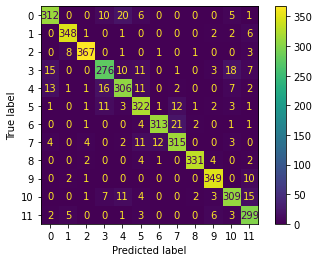

In [60]:
cm = metrics.plot_confusion_matrix(clf, X_test, y_test)
#disp.figure_.suptitle("Confusion Matrix")
#print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

# Congratulations on completing the exercise!¶
## Hope you enjoyed the questions. Thank you !!!
### Please like, share and subscribe to learndataa
https://www.youtube.com/channel/UCzUpHQAfj3ulmJkTAfBtXLw/

In [ ]:
#learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa learndataa